# notebook to examine all quality features to see which might be related to R^2 performance
these can include motion, arousal, and t1 quality (kwyk uncertainty or visual inspection)

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore, skew,kurtosis
from scipy.signal import welch, find_peaks
import json
import pandas as pd

In [21]:
with open('pilots2_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]
#good_subjects_list.remove('NDARUT018UYN') #no freesurfer sub
# good_subjects_list.remove('NDARRM073JKA')#xcp straggler


# with open('good_pilots_ru_dm_list.txt', 'r') as file:
#     sub_list = file.readlines()
# good_subjects_list = [line.strip() for line in sub_list]

# good_subjects_list


In [22]:
good_subjects_list[0]

'NDARFR108JNB'

## first look at the ridgecv results

### load new arousal

In [23]:
# arousal_full_list=[]
# for sub in good_subjects_list:
#     arousal_full_multiplied=np.load(f'../data/features/{sub}_full_template_arousal_XCP.npy' )
#     #plt.plot(zscore(arousal_full_multiplied),linewidth=0.5)
#     arousal_full_list.append(zscore(arousal_full_multiplied))
# #plt.plot(  np.mean(np.asanyarray(arousal_full_list),axis=0)  ,linewidth=1,c='k')

# one_percent_list=[]
# for sub in good_subjects_list:
#     one_percent_multiplied=np.load(f'../data/features/{sub}_one_percent_arousal_XCP.npy' )
#     #plt.plot(zscore(one_percent_multiplied),linewidth=0.5)
#     one_percent_list.append(zscore(one_percent_multiplied))
# #plt.plot(  np.mean(np.asanyarray(one_percent_list),axis=0)  ,linewidth=1,c='k')
# #print(np.asanyarray(one_percent_list).shape)

In [24]:
# import nat_asd_utils

# # Define a function to calculate RMS
# def compute_rms(timecourse):
#     return np.sqrt(np.mean(np.square(timecourse)))

# # Compute skewness and kurtosis
# def compute_skewness(timecourse):
#     return skew(timecourse)

# def compute_kurtosis(timecourse):
#     return kurtosis(timecourse)

metrics = {
    #'grand_mean': [],
    #'mean_variance': [],
    #'mean_std_dev': [],
    #'arousal_mean_range': [],
    #'arousal_mean_iqr': [],
    #'arousal_mean_mad': [],
    #'arousal_mean_cv': [],
    #'grand_autocorrelation': [],
    # 'arousal_grand_psd': [],
    #'grand_rms': [],
    # 'arousal_grand_peak_count': [],
    #'arousal_grand_peak_amplitude': [],
    #'arousal_grand_peak_frequency': [],
    # 'arousal_grand_skewness': [],
    # 'arousal_grand_kurtosis': [],
    # 'arousal_one_percent_drop': [],
    # 'arousal_mean10_one_percent_drop': [],
    # 'arousal_mean50_one_percent_drop': [],
    # 'arousal_mean100_one_percent_drop': [],
    # 'uncertainty': [],
    'Mean_FD': [],
    'Max_FD': [],
    'R2': [],
}




# for v in one_percent_list:
#     v_mean=v
#     #metrics['grand_mean'].append(np.mean(v_mean))
#     #metrics['mean_variance'].append(np.var(v_mean))
#     #metrics['mean_std_dev'].append(np.std(v_mean))
#     #metrics['arousal_mean_range'].append(np.ptp(v_mean))
#     #metrics['arousal_mean_iqr'].append(np.percentile(v_mean, 75) - np.percentile(v_mean, 25))
#     #metrics['arousal_mean_mad'].append(np.mean(np.abs(v_mean - np.mean(v_mean))))
#     #metrics['arousal_mean_cv'].append(np.std(v_mean)/np.mean(v_mean))

#     # Compute Autocorrelation
#     # v_autocorr = correlate(v_mean, v_mean, mode='full')
#     # v_autocorr = v_autocorr[v_autocorr.size // 2:]  # Keep positive lags
#     # metrics['grand_autocorrelation'].append(np.mean(v_autocorr))

#     # Compute Power Spectral Density (PSD)
#     # freqs, psd = welch(v_mean)
#     # metrics['arousal_grand_psd'].append(np.mean(psd))  # Mean PSD

#     # Compute Root Mean Square (RMS)
#     #metrics['grand_rms'].append(compute_rms(v_mean))

#     # Peak Detection
#     # peaks, _ = find_peaks(v_mean)
#     # peak_count = float(len(peaks))
#     # metrics['arousal_grand_peak_count'].append(float(peak_count))
    
#     # Amplitude of Peaks
#     # peak_amplitudes = v_mean[peaks] if peak_count > 0 else np.array([])
#     # if peak_count > 0:
#     #     mean_peak_amplitude = np.mean(peak_amplitudes)
#     # else:
#     #     mean_peak_amplitude = 0
#     # metrics['arousal_grand_peak_amplitude'].append(mean_peak_amplitude)

#     # Peak Frequency
#     # if peak_count > 0:
#     #     peak_frequency = peak_count / len(v_mean)  # Peaks per sample
#     # else:
#     #     peak_frequency = 0
#     # metrics['arousal_grand_peak_frequency'].append(peak_frequency)

#     metrics['arousal_grand_skewness'].append(compute_skewness(v_mean))
#     metrics['arousal_grand_kurtosis'].append(compute_kurtosis(v_mean))
    
    
#     # # # # arousal drop
#     metrics['arousal_one_percent_drop'].append(v_mean[0]-v_mean[-1])
#     mean10=np.mean(v_mean[0:10])-np.mean(v_mean[-10:])
#     metrics['arousal_mean10_one_percent_drop'].append(mean10)
#     mean10=np.mean(v_mean[0:50])-np.mean(v_mean[-50:])
#     metrics['arousal_mean50_one_percent_drop'].append(mean10)
#     mean10=np.mean(v_mean[0:100])-np.mean(v_mean[-100:])
#     metrics['arousal_mean100_one_percent_drop'].append(mean10)

   

### load kwyk uncertainty and FD and $R^2$

In [25]:
 # # # # kwyk uncertainty
for sub in good_subjects_list:
    # with open(f'/om2/user/jsmentch/kwyk/{sub}_uncertainty.json', 'r') as file:
        # data = json.load(file)    
    #metrics['uncertainty'].append(data['uncertainty'])
    confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    df = pd.read_csv(confounds_file, sep='\t')
    metrics['Mean_FD'].append(np.mean(df['framewise_displacement']))
    metrics['Max_FD'].append(np.max(df['framewise_displacement']))

    #loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-manualhrf_srp05_delay-0.npz')
    metrics['R2'].append(np.mean(loaded['stacked_r2s']))

In [26]:
print(list(df.columns))

['global_signal', 'global_signal_derivative1', 'global_signal_derivative1_power2', 'global_signal_power2', 'csf', 'csf_derivative1', 'csf_derivative1_power2', 'csf_power2', 'white_matter', 'white_matter_derivative1', 'white_matter_power2', 'white_matter_derivative1_power2', 'csf_wm', 'tcompcor', 'std_dvars', 'dvars', 'framewise_displacement', 'rmsd', 't_comp_cor_00', 't_comp_cor_01', 't_comp_cor_02', 't_comp_cor_03', 'c_comp_cor_00', 'c_comp_cor_01', 'c_comp_cor_02', 'c_comp_cor_03', 'c_comp_cor_04', 'c_comp_cor_05', 'c_comp_cor_06', 'c_comp_cor_07', 'c_comp_cor_08', 'c_comp_cor_09', 'c_comp_cor_10', 'c_comp_cor_11', 'c_comp_cor_12', 'c_comp_cor_13', 'c_comp_cor_14', 'c_comp_cor_15', 'c_comp_cor_16', 'c_comp_cor_17', 'c_comp_cor_18', 'c_comp_cor_19', 'c_comp_cor_20', 'c_comp_cor_21', 'c_comp_cor_22', 'c_comp_cor_23', 'c_comp_cor_24', 'c_comp_cor_25', 'c_comp_cor_26', 'w_comp_cor_00', 'w_comp_cor_01', 'w_comp_cor_02', 'w_comp_cor_03', 'w_comp_cor_04', 'w_comp_cor_05', 'w_comp_cor_06', '

### load mriqc stuff

In [27]:
df = pd.read_csv(f'../data/all_qc.csv')
filtered_df = df[(df['sub'].isin(good_subjects_list)) & (df['task'] == 'movieDM')]
asd = filtered_df.loc[filtered_df['sub'] == good_subjects_list[0], 'fd_mean'].values[0]
print(filtered_df.columns)

Index(['aor', 'aqi', 'bids_meta', 'dummy_trs', 'dvars_nstd', 'dvars_std',
       'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg',
       'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y', 'provenance',
       'size_t', 'size_x', 'size_y', 'size_z', 'snr', 'spacing_tr',
       'spacing_x', 'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k',
       'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median',
       'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv',
       'tsnr', 'subj_id', 'run_bad', 'ses', 'sub', 'task', 'relaxed_fd50',
       'dorit_fd40'],
      dtype='object')


In [28]:
fd_list=['aor', 'aqi',  'dvars_nstd', 'dvars_std',
       'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg',
       'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y',
       'snr', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k',
       'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median',
       'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv',
       'tsnr',
       'dorit_fd40']

for name in fd_list:
    metrics[name] = []

for name in fd_list:
    for sub in good_subjects_list:
        metrics[name].append( filtered_df.loc[filtered_df['sub'] == sub, name].values[0] )


### load demographics stuff as well

In [29]:
df = pd.read_csv(f'../data/pilots2_ru_dm.csv')
fd_list=['Age_control', 'Sex']

for name in fd_list:
    metrics[name] = []

for name in fd_list:
    for sub in good_subjects_list:
        metrics[name].append( df.loc[df['Identifiers_y'] == sub, name].values[0] )
metrics['Sex'] = list(map({'female': 0, 'male': 1}.get, metrics['Sex']))

In [30]:
value = metrics.pop('R2')

# Reinsert the key at the end of the dictionary
metrics['R2'] = value

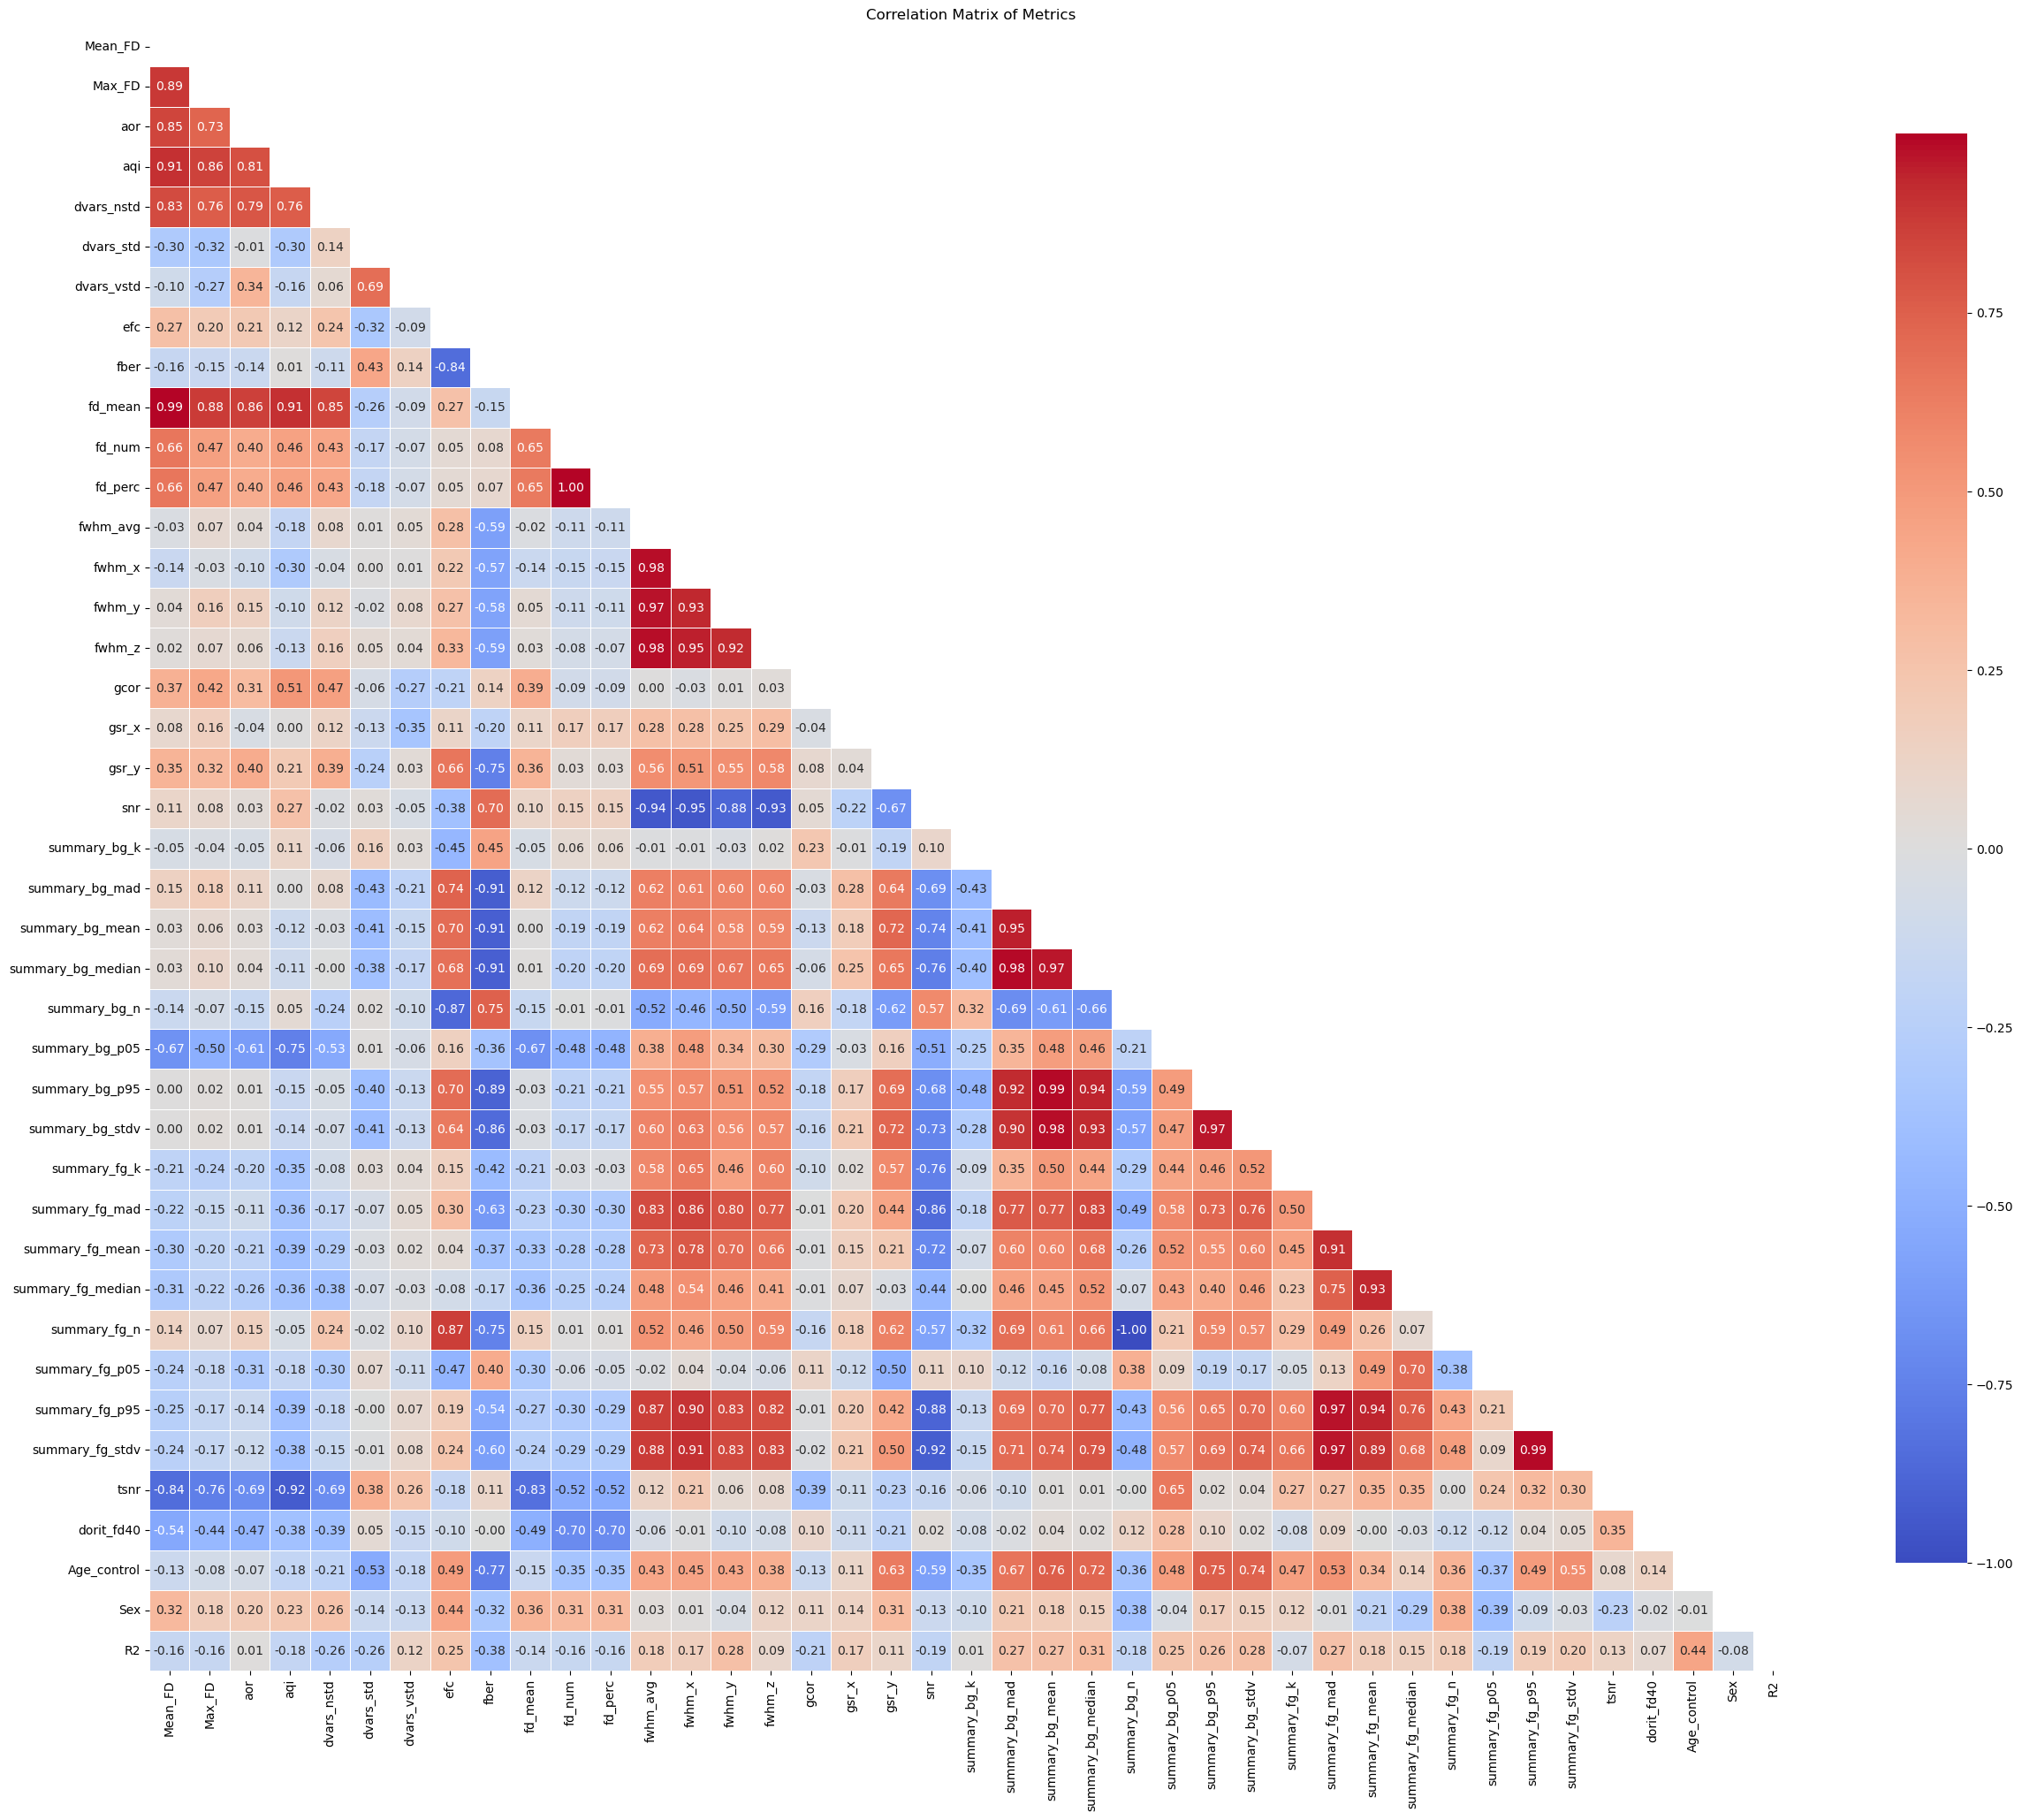

In [31]:
import pandas as pd
import seaborn as sns

# Convert dictionaries to DataFrames
df_combined = pd.DataFrame(metrics)

# Flatten MultiIndex columns
#df_combined.columns = ['_'.join(col) for col in df_combined.columns]

# Compute correlation matrix
corr_matrix = df_combined.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Metrics')
# plt.show()




mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Choose a custom colormap (e.g., 'coolwarm')
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Plot the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, fmt='.2f',linewidths=.5, cbar_kws={"shrink": 0.7})


# plt.xticks( np.arange(len(feature_names))+.5, feature_names, rotation=45)
# plt.yticks( np.arange(len(feature_names))+.5, feature_names, rotation=0)
plt.title("Correlation Matrix of Metrics")

plt.show()

## look at different thresholds of various features by subject

/tmp/ipykernel_2986206/2780754137.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
/tmp/ipykernel_2986206/2780754137.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'<{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])
/tmp/ipykernel_2986206/2780754137.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
/tmp/ipykernel_2986206/2780754137.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'<{thresh}\n n={count_list[i]}' for i,thresh in en

KeyError: 'uncertainty'

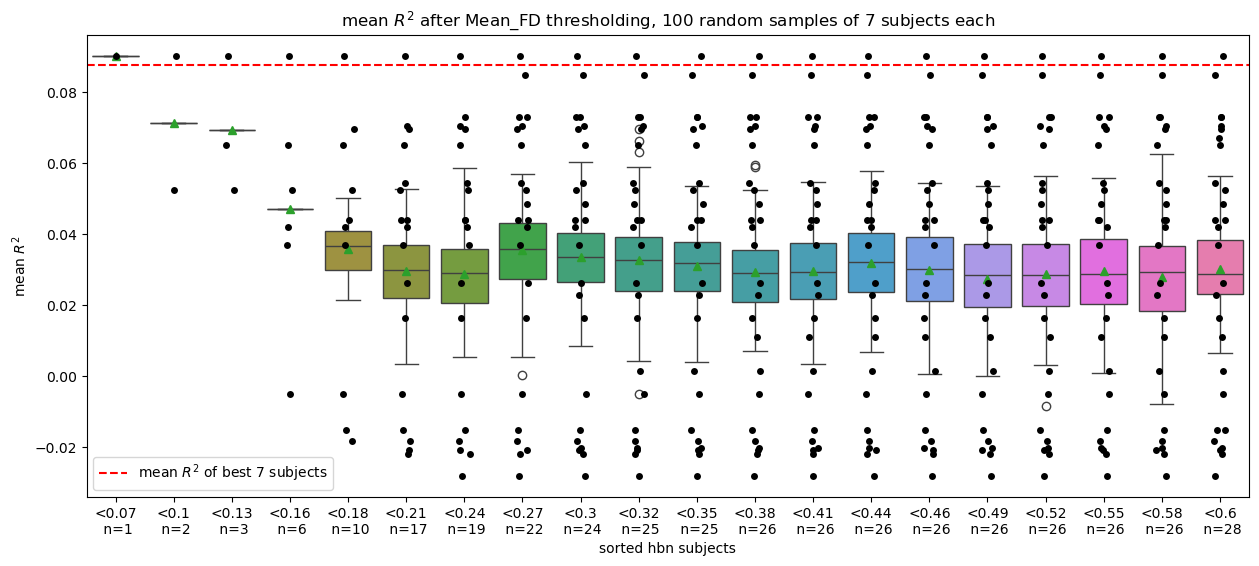

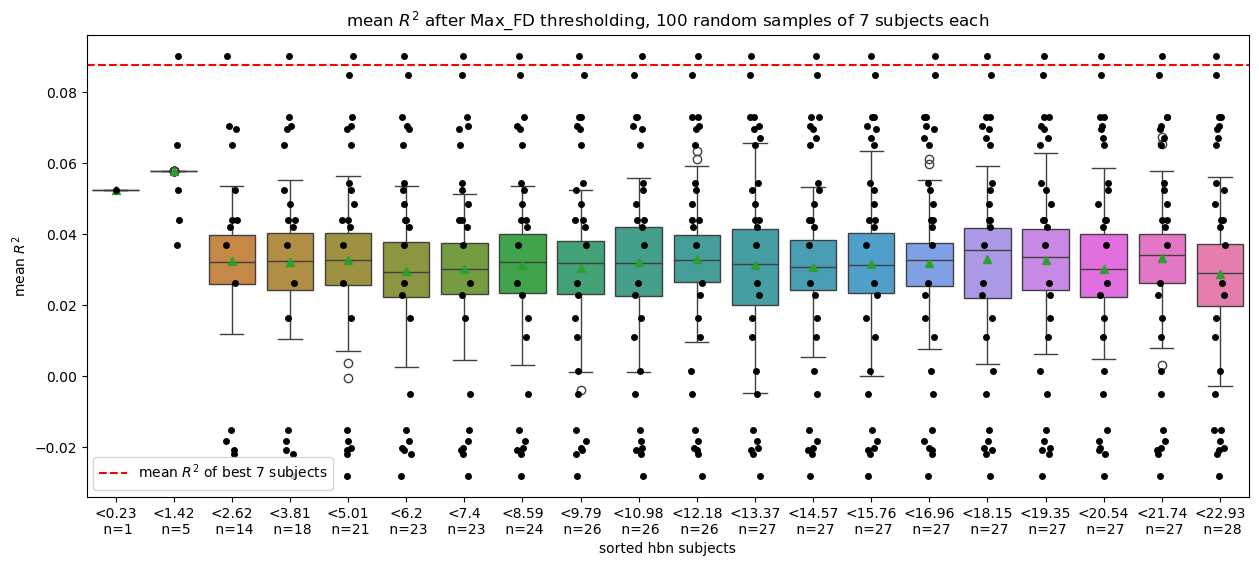

In [32]:
import random
features_list=['Mean_FD', 'Max_FD', 'uncertainty', 'arousal_grand_skewness', 'dvars_nstd','gcor','dorit_fd40']

for feature in features_list: 
    minimum=min(metrics[feature])
    maximum=max(metrics[feature])
    
    thresholds=np.round(  np.linspace(minimum+(minimum*.1),max(metrics[feature])+(minimum*.1),20)  ,2)
    
    
    fd_thresh_list=[]
    fd_thresh_list_all=[]
    count_list=[]
    for fd_thresh in thresholds:#[2.0,1.0,0.5,0.4,0.3,0.25,0.2,0.15]:
        #print(f'thresh: {fd_thresh}')
        count = len([value for value in metrics[feature] if value < fd_thresh])
        count_list.append(count)
        #print(count)
        # Step 1: Identify indices where values in mriqc_fd_mean_list_sorted are less than x
        indices = [i for i, value in enumerate(metrics[feature]) if value < fd_thresh]
        
        # Step 2: Extract corresponding values from r2_list_sorted
        subset_r2 = [metrics['R2'][i] for i in indices]
        
        # Step 3: Randomly select values from this subset
        # Specify the number of random selections you want to make
        perms_list=[]
        for perms in np.arange(100):
            num_selections = 7
            random_selection = random.sample(subset_r2, min(num_selections, len(subset_r2)))
            #print(random_selection)
            # Step 4: Calculate the mean of the randomly selected values
            mean_value = np.mean(random_selection) if random_selection else None
            #print(mean_value)
            perms_list.append(mean_value)
        fd_thresh_list.append(perms_list)
        fd_thresh_list_all.append(subset_r2)
    
    fig, ax = plt.subplots(figsize=(15, 6))
    
    sns.boxplot(fd_thresh_list,showmeans=True)
    sns.stripplot(data=fd_thresh_list_all, color='black', jitter=True, dodge=True)

    ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
    ax.set_xlabel('sorted hbn subjects')
    ax.set_ylabel('mean $R^2$')
    ax.set_title(f'mean $R^2$ after {feature} thresholding, 100 random samples of 7 subjects each')
    #ax.set_xticks(ind + width / num_bars)
    ax.set_xticklabels([f'<{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])
    
    plt.axhline(y=np.mean([value for value in metrics['R2'] if value > 0.081]), color='r', linestyle='--',label='mean $R^2$ of best 7 subjects')
    plt.legend()

In [ ]:
import random
features_list=['Mean_FD', 'Max_FD', 'uncertainty', 'arousal_grand_skewness', 'dvars_nstd','gcor']

for feature in features_list: 
    minimum=min(metrics[feature])
    maximum=max(metrics[feature])
    
    thresholds=np.round(  np.linspace(minimum+(minimum*.1),max(metrics[feature])+(minimum*.1),20)  ,2)
    
    
    fd_thresh_list=[]
    fd_thresh_list_all=[]
    count_list=[]
    for fd_thresh in thresholds:#[2.0,1.0,0.5,0.4,0.3,0.25,0.2,0.15]:
        #print(f'thresh: {fd_thresh}')
        count = len([value for value in metrics[feature] if value > fd_thresh])
        count_list.append(count)
        #print(count)
        # Step 1: Identify indices where values in mriqc_fd_mean_list_sorted are less than x
        indices = [i for i, value in enumerate(metrics[feature]) if value > fd_thresh]
        
        # Step 2: Extract corresponding values from r2_list_sorted
        subset_r2 = [metrics['R2'][i] for i in indices]
        
        # Step 3: Randomly select values from this subset
        # Specify the number of random selections you want to make
        perms_list=[]
        for perms in np.arange(100):
            num_selections = 7
            random_selection = random.sample(subset_r2, min(num_selections, len(subset_r2)))
            #print(random_selection)
            # Step 4: Calculate the mean of the randomly selected values
            mean_value = np.mean(random_selection) if random_selection else None
            #print(mean_value)
            perms_list.append(mean_value)
        fd_thresh_list.append(perms_list)
        fd_thresh_list_all.append(subset_r2)
    
    fig, ax = plt.subplots(figsize=(15, 6))
    
    sns.boxplot(fd_thresh_list,showmeans=True)
    sns.stripplot(data=fd_thresh_list_all, color='black', jitter=True, dodge=True)

    ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
    ax.set_xlabel('sorted hbn subjects')
    ax.set_ylabel('mean $R^2$')
    ax.set_title(f'mean $R^2$ after {feature} thresholding, 100 random samples of 7 subjects each')
    #ax.set_xticks(ind + width / num_bars)
    ax.set_xticklabels([f'>{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])
    
    plt.axhline(y=np.mean([value for value in metrics['R2'] if value > 0.081]), color='r', linestyle='--',label='mean $R^2$ of best 7 subjects')
    plt.legend()

### plot subjects excluded by certain thresholds

/tmp/ipykernel_3719155/3433375039.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(features_names)


Text(0, 0.5, 'mean subject $R^2$')

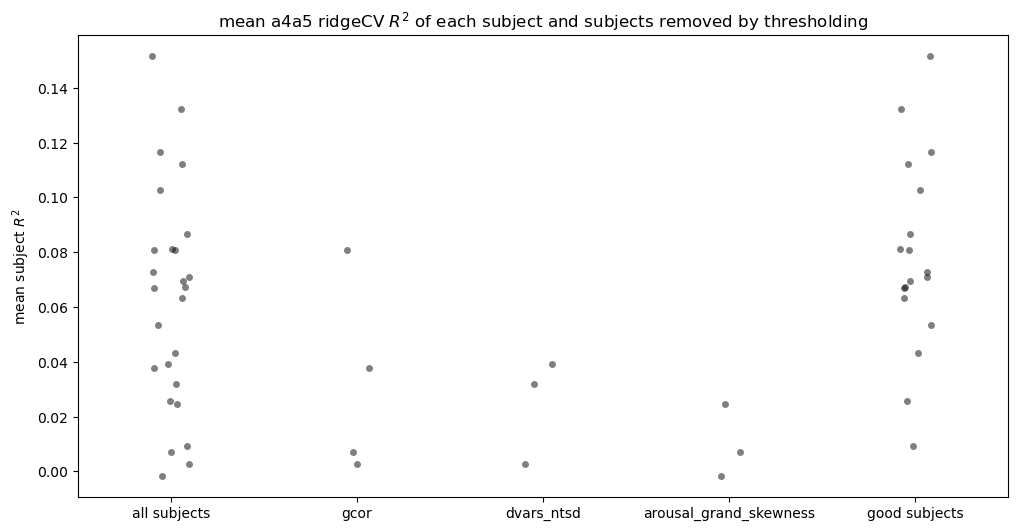

In [45]:
# thresholds:
# gcor<0.05
# dvars_ntsd<39
# arousal_grand_skewness>-0.2
features_names=['all subjects','gcor','dvars_ntsd','arousal_grand_skewness','good subjects']
features_list_lessthan=['gcor','dvars_nstd']
features_list_lessthan_values=[0.05,40]
features_list_greaterthan=['arousal_grand_skewness']
features_list_greaterthan_values=[-0.21]

features_data=[]

features_data.append(metrics['R2'])
remove_indices=[]
for ii,feature in enumerate(features_list_lessthan):
    indices = [i for i, value in enumerate(metrics[feature]) if value > features_list_lessthan_values[ii]]
    subset_r2 = [metrics['R2'][i] for i in indices]
    for r in indices:
        remove_indices.append(r)
    features_data.append(subset_r2)

for ii,feature in enumerate(features_list_greaterthan):
    indices = [i for i, value in enumerate(metrics[feature]) if value < features_list_greaterthan_values[ii]]
    subset_r2 = [metrics['R2'][i] for i in indices]
    features_data.append(subset_r2)
    for r in indices:
        remove_indices.append(r)

list(set(remove_indices))
good_r2 = [item for i, item in enumerate(metrics['R2']) if i not in remove_indices]
features_data.append(good_r2)
fig, ax = plt.subplots(figsize=(12, 6))

sns.stripplot(data=features_data, color='k', jitter=True, dodge=True,alpha=0.5)
ax.set_xticklabels(features_names)
ax.set_title(f'mean a4a5 ridgeCV $R^2$ of each subject and subjects removed by thresholding')
ax.set_ylabel('mean subject $R^2$')

# now repeat but look at the stacked_R2

In [70]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore, skew,kurtosis
from scipy.signal import welch, find_peaks
import json
import pandas as pd

In [71]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]
#good_subjects_list.remove('NDARUT018UYN') #no freesurfer sub
# good_subjects_list.remove('NDARRM073JKA')#xcp straggler


# with open('good_pilots_ru_dm_list.txt', 'r') as file:
#     sub_list = file.readlines()
# good_subjects_list = [line.strip() for line in sub_list]

# good_subjects_list


### load new arousal

In [72]:
arousal_full_list=[]
for sub in good_subjects_list:
    arousal_full_multiplied=np.load(f'../data/features/{sub}_full_template_arousal_XCP.npy' )
    #plt.plot(zscore(arousal_full_multiplied),linewidth=0.5)
    arousal_full_list.append(zscore(arousal_full_multiplied))
#plt.plot(  np.mean(np.asanyarray(arousal_full_list),axis=0)  ,linewidth=1,c='k')

one_percent_list=[]
for sub in good_subjects_list:
    one_percent_multiplied=np.load(f'../data/features/{sub}_one_percent_arousal_XCP.npy' )
    #plt.plot(zscore(one_percent_multiplied),linewidth=0.5)
    one_percent_list.append(zscore(one_percent_multiplied))
#plt.plot(  np.mean(np.asanyarray(one_percent_list),axis=0)  ,linewidth=1,c='k')
#print(np.asanyarray(one_percent_list).shape)

In [73]:
import nat_asd_utils

# Define a function to calculate RMS
def compute_rms(timecourse):
    return np.sqrt(np.mean(np.square(timecourse)))

# Compute skewness and kurtosis
def compute_skewness(timecourse):
    return skew(timecourse)

def compute_kurtosis(timecourse):
    return kurtosis(timecourse)

metrics = {
    #'grand_mean': [],
    #'mean_variance': [],
    #'mean_std_dev': [],
    #'arousal_mean_range': [],
    #'arousal_mean_iqr': [],
    #'arousal_mean_mad': [],
    #'arousal_mean_cv': [],
    #'grand_autocorrelation': [],
    # 'arousal_grand_psd': [],
    #'grand_rms': [],
    # 'arousal_grand_peak_count': [],
    #'arousal_grand_peak_amplitude': [],
    #'arousal_grand_peak_frequency': [],
    'arousal_grand_skewness': [],
    'arousal_grand_kurtosis': [],
    'arousal_one_percent_drop': [],
    'arousal_mean10_one_percent_drop': [],
    'arousal_mean50_one_percent_drop': [],
    'arousal_mean100_one_percent_drop': [],
    'uncertainty': [],
    'Mean_FD': [],
    'Max_FD': [],
    'R2': [],
}




for v in one_percent_list:
    v_mean=v
    #metrics['grand_mean'].append(np.mean(v_mean))
    #metrics['mean_variance'].append(np.var(v_mean))
    #metrics['mean_std_dev'].append(np.std(v_mean))
    #metrics['arousal_mean_range'].append(np.ptp(v_mean))
    #metrics['arousal_mean_iqr'].append(np.percentile(v_mean, 75) - np.percentile(v_mean, 25))
    #metrics['arousal_mean_mad'].append(np.mean(np.abs(v_mean - np.mean(v_mean))))
    #metrics['arousal_mean_cv'].append(np.std(v_mean)/np.mean(v_mean))

    # Compute Autocorrelation
    # v_autocorr = correlate(v_mean, v_mean, mode='full')
    # v_autocorr = v_autocorr[v_autocorr.size // 2:]  # Keep positive lags
    # metrics['grand_autocorrelation'].append(np.mean(v_autocorr))

    # Compute Power Spectral Density (PSD)
    # freqs, psd = welch(v_mean)
    # metrics['arousal_grand_psd'].append(np.mean(psd))  # Mean PSD

    # Compute Root Mean Square (RMS)
    #metrics['grand_rms'].append(compute_rms(v_mean))

    # Peak Detection
    # peaks, _ = find_peaks(v_mean)
    # peak_count = float(len(peaks))
    # metrics['arousal_grand_peak_count'].append(float(peak_count))
    
    # Amplitude of Peaks
    # peak_amplitudes = v_mean[peaks] if peak_count > 0 else np.array([])
    # if peak_count > 0:
    #     mean_peak_amplitude = np.mean(peak_amplitudes)
    # else:
    #     mean_peak_amplitude = 0
    # metrics['arousal_grand_peak_amplitude'].append(mean_peak_amplitude)

    # Peak Frequency
    # if peak_count > 0:
    #     peak_frequency = peak_count / len(v_mean)  # Peaks per sample
    # else:
    #     peak_frequency = 0
    # metrics['arousal_grand_peak_frequency'].append(peak_frequency)

    metrics['arousal_grand_skewness'].append(compute_skewness(v_mean))
    metrics['arousal_grand_kurtosis'].append(compute_kurtosis(v_mean))
    
    
    # # # # arousal drop
    metrics['arousal_one_percent_drop'].append(v_mean[0]-v_mean[-1])
    mean10=np.mean(v_mean[0:10])-np.mean(v_mean[-10:])
    metrics['arousal_mean10_one_percent_drop'].append(mean10)
    mean10=np.mean(v_mean[0:50])-np.mean(v_mean[-50:])
    metrics['arousal_mean50_one_percent_drop'].append(mean10)
    mean10=np.mean(v_mean[0:100])-np.mean(v_mean[-100:])
    metrics['arousal_mean100_one_percent_drop'].append(mean10)

   

### load kwyk uncertainty and FD and $R^2$

In [74]:
 # # # # kwyk uncertainty
for sub in good_subjects_list:
    with open(f'/om2/user/jsmentch/kwyk/{sub}_uncertainty.json', 'r') as file:
        data = json.load(file)    
    metrics['uncertainty'].append(data['uncertainty'])
    confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    df = pd.read_csv(confounds_file, sep='\t')
    metrics['Mean_FD'].append(np.mean(df['framewise_displacement']))
    metrics['Max_FD'].append(np.max(df['framewise_displacement']))


    #loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-manualhrf_srp05_delay-0.npz')
    metrics['R2'].append(np.mean(loaded['stacked_r2s']))

### load mriqc stuff

In [75]:
df = pd.read_csv(f'../data/all_qc.csv')
filtered_df = df[(df['sub'].isin(good_subjects_list)) & (df['task'] == 'movieDM')]
asd = filtered_df.loc[filtered_df['sub'] == good_subjects_list[0], 'fd_mean'].values[0]
print(filtered_df.columns)

Index(['aor', 'aqi', 'bids_meta', 'dummy_trs', 'dvars_nstd', 'dvars_std',
       'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg',
       'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y', 'provenance',
       'size_t', 'size_x', 'size_y', 'size_z', 'snr', 'spacing_tr',
       'spacing_x', 'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k',
       'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median',
       'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv',
       'tsnr', 'subj_id', 'run_bad', 'ses', 'sub', 'task', 'relaxed_fd50',
       'dorit_fd40'],
      dtype='object')


In [76]:
fd_list=['aor', 'aqi',  'dvars_nstd', 'dvars_std',
       'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg',
       'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y',
       'snr', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k',
       'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median',
       'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv',
       'tsnr',
       'dorit_fd40']

for name in fd_list:
    metrics[name] = []

for name in fd_list:
    for sub in good_subjects_list:
        metrics[name].append( filtered_df.loc[filtered_df['sub'] == sub, name].values[0] )


### load demographics stuff as well

In [77]:
df = pd.read_csv(f'../data/pilots_ru_dm.csv')
fd_list=['Age_control', 'Sex']

for name in fd_list:
    metrics[name] = []

for name in fd_list:
    for sub in good_subjects_list:
        metrics[name].append( df.loc[df['Identifiers_y'] == sub, name].values[0] )
metrics['Sex'] = list(map({'female': 0, 'male': 1}.get, metrics['Sex']))

In [78]:
value = metrics.pop('R2')

# Reinsert the key at the end of the dictionary
metrics['R2'] = value

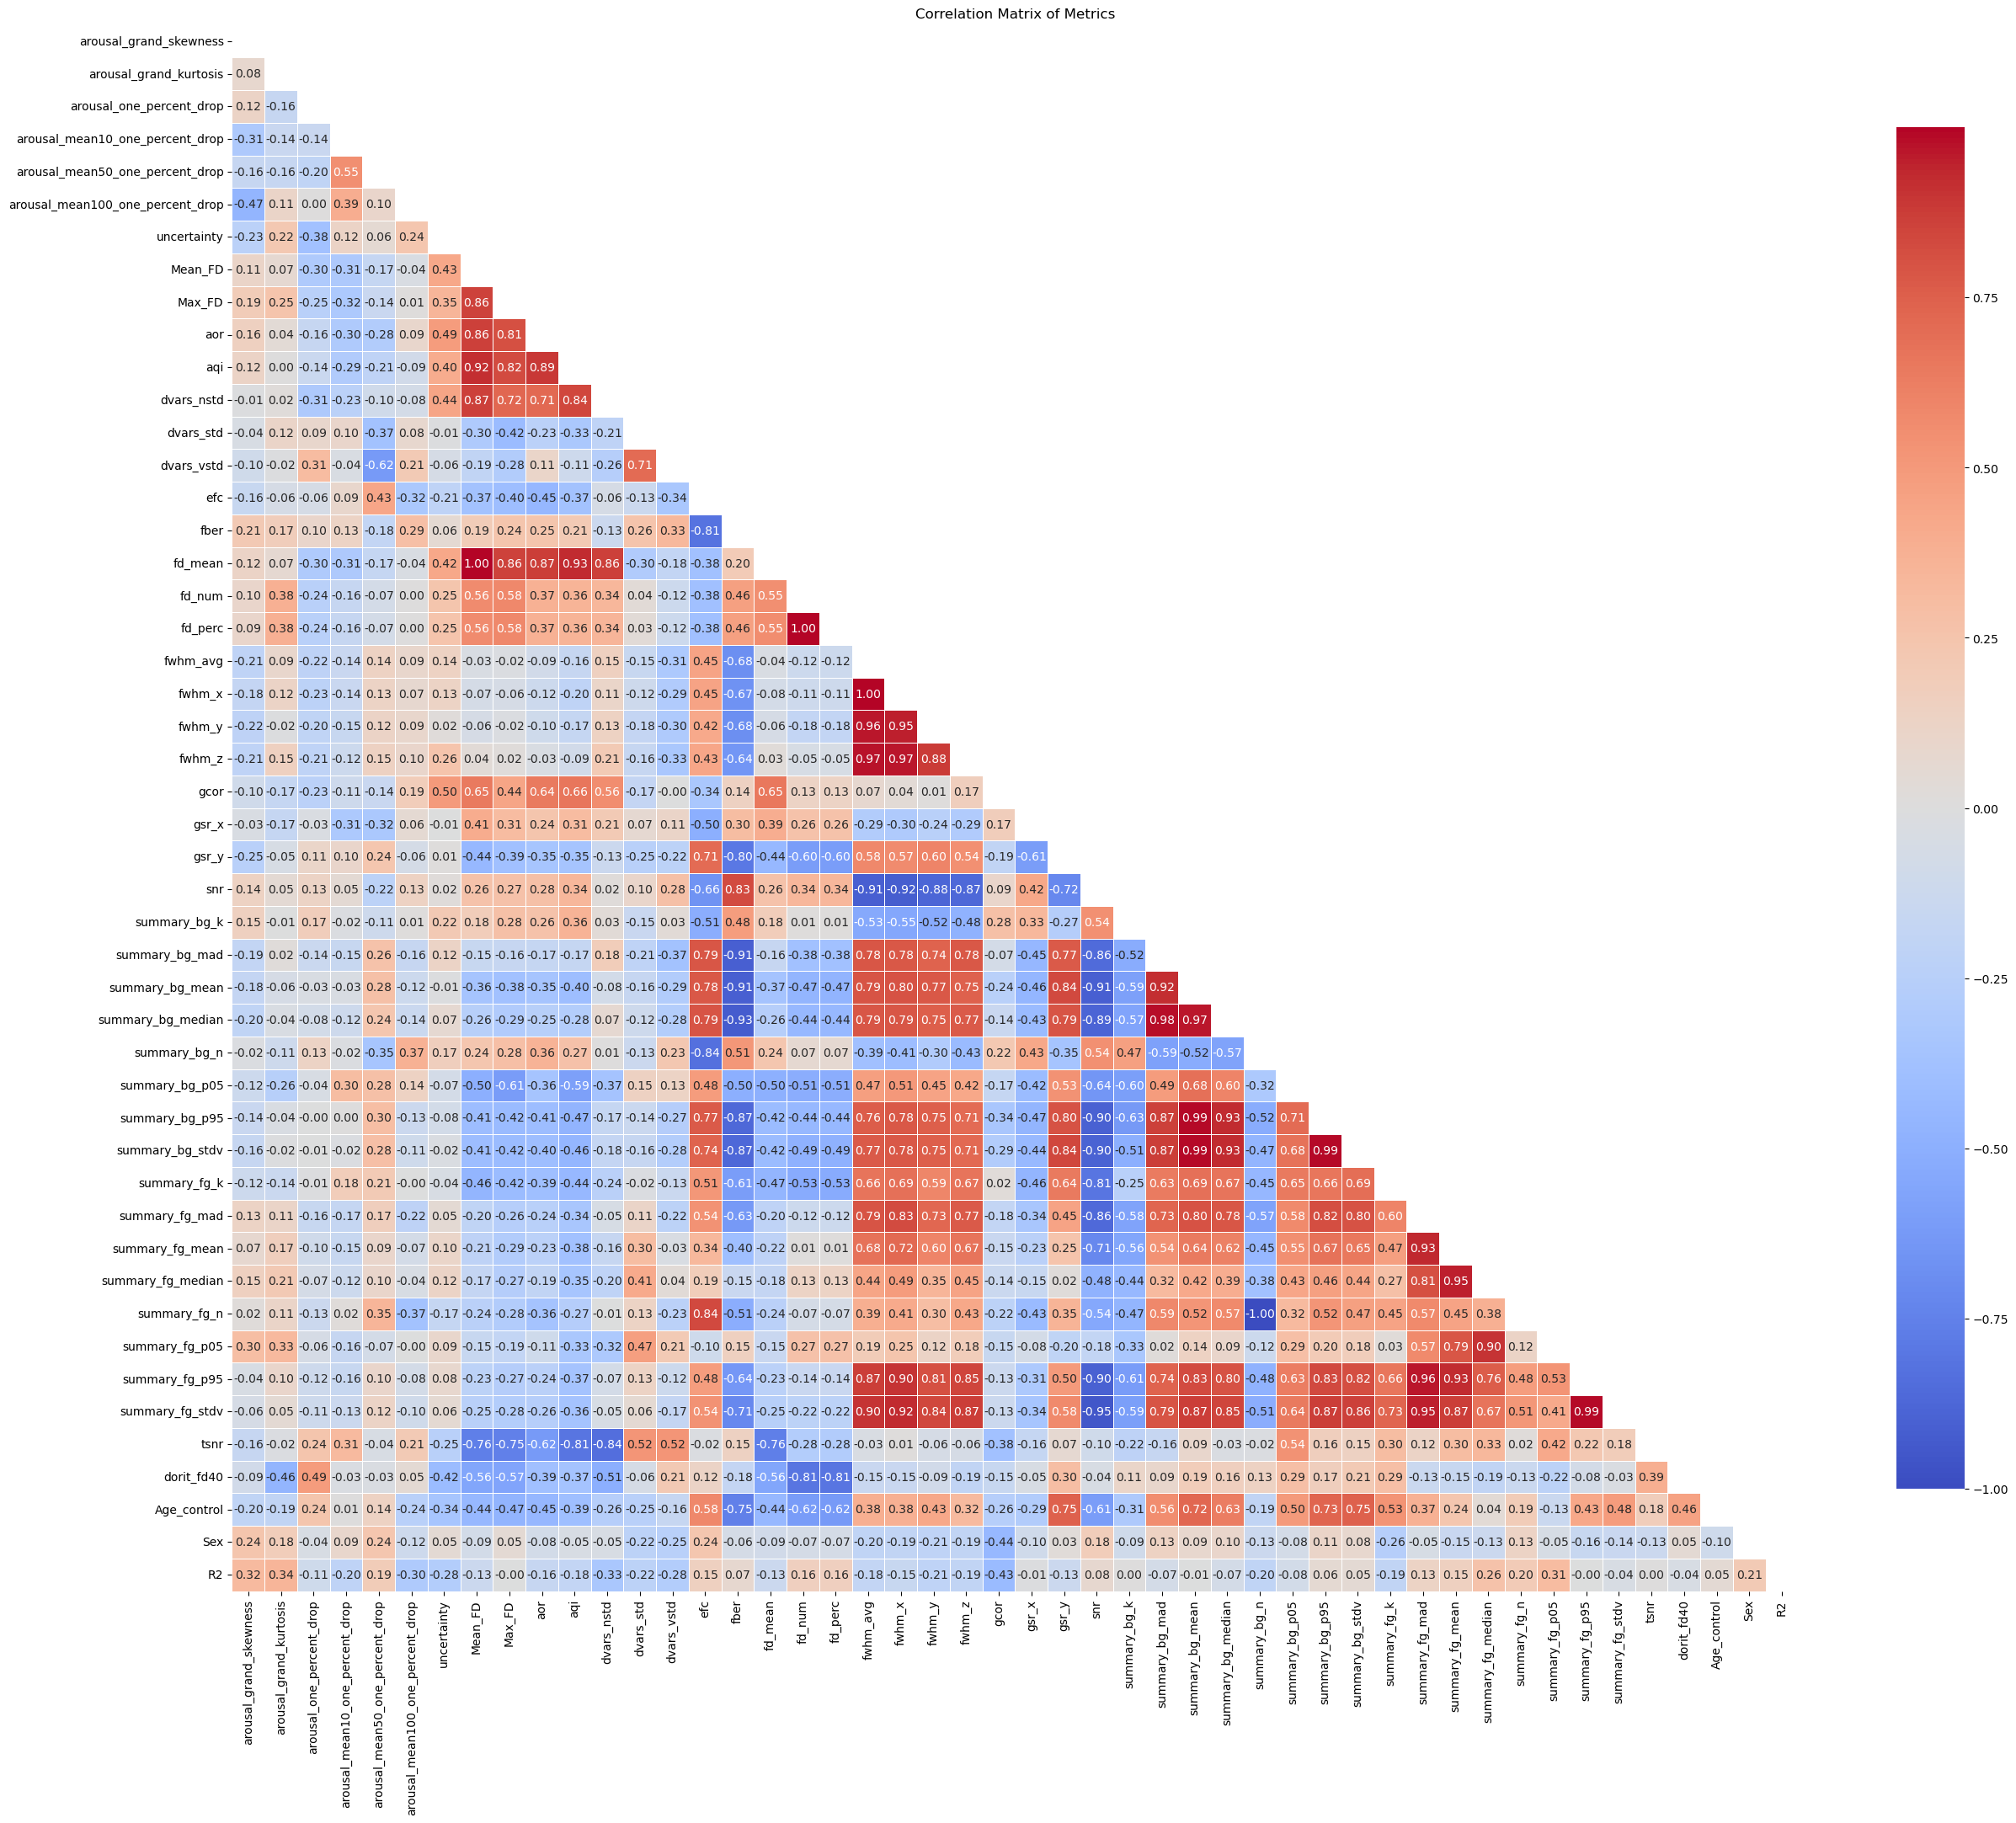

In [79]:
import pandas as pd
import seaborn as sns

# Convert dictionaries to DataFrames
df_combined = pd.DataFrame(metrics)

# Flatten MultiIndex columns
#df_combined.columns = ['_'.join(col) for col in df_combined.columns]

# Compute correlation matrix
corr_matrix = df_combined.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Metrics')
# plt.show()




mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Choose a custom colormap (e.g., 'coolwarm')
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Plot the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, fmt='.2f',linewidths=.5, cbar_kws={"shrink": 0.7})


# plt.xticks( np.arange(len(feature_names))+.5, feature_names, rotation=45)
# plt.yticks( np.arange(len(feature_names))+.5, feature_names, rotation=0)
plt.title("Correlation Matrix of Metrics")

plt.show()

## look at different thresholds of various features by subject

/tmp/ipykernel_3719155/2780754137.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
/tmp/ipykernel_3719155/2780754137.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'<{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])
/tmp/ipykernel_3719155/2780754137.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
/tmp/ipykernel_3719155/2780754137.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'<{thresh}\n n={count_list[i]}' for i,thresh in en

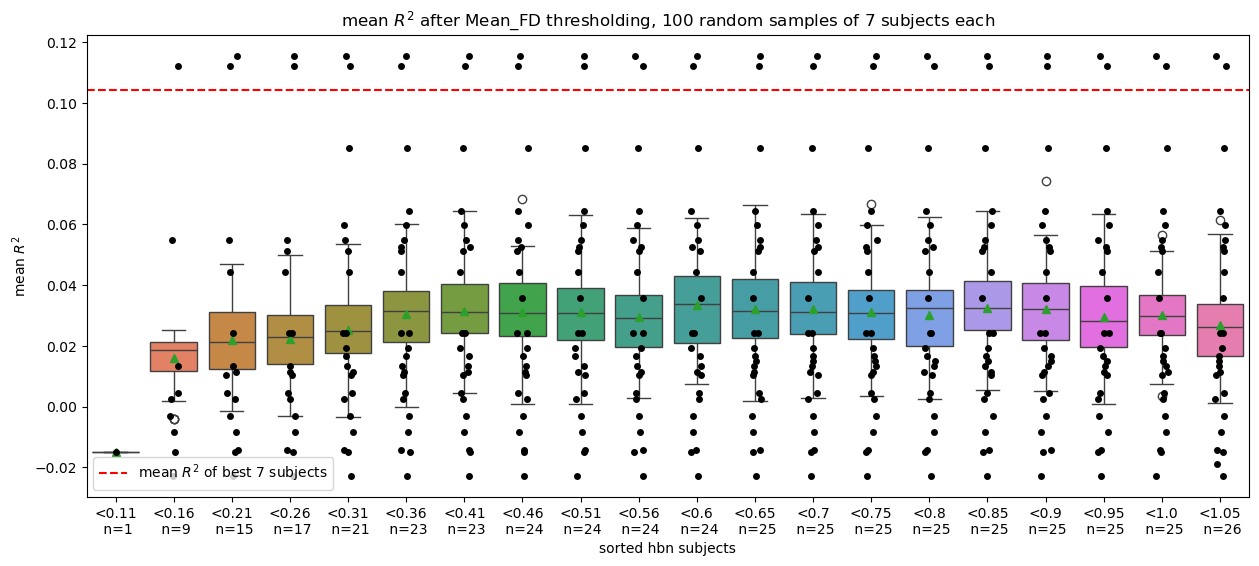

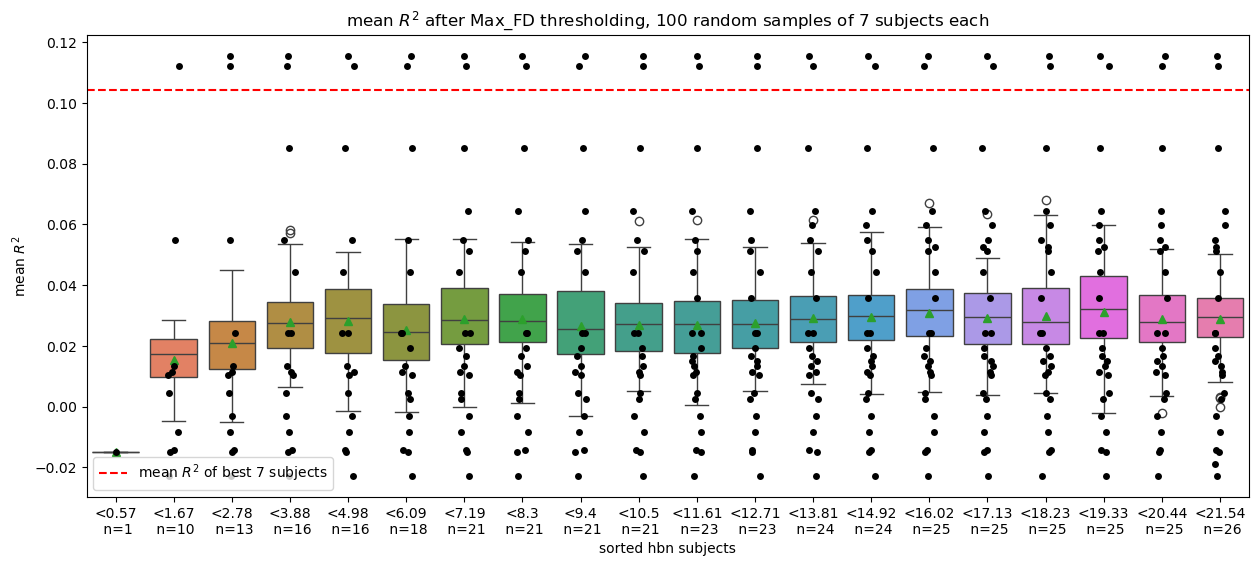

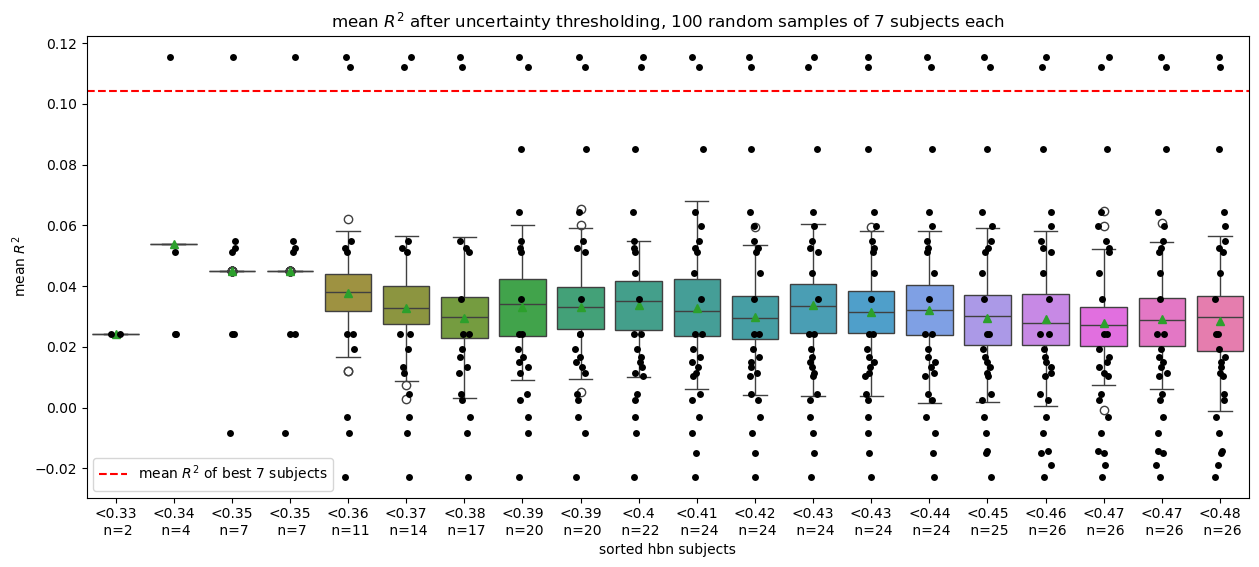

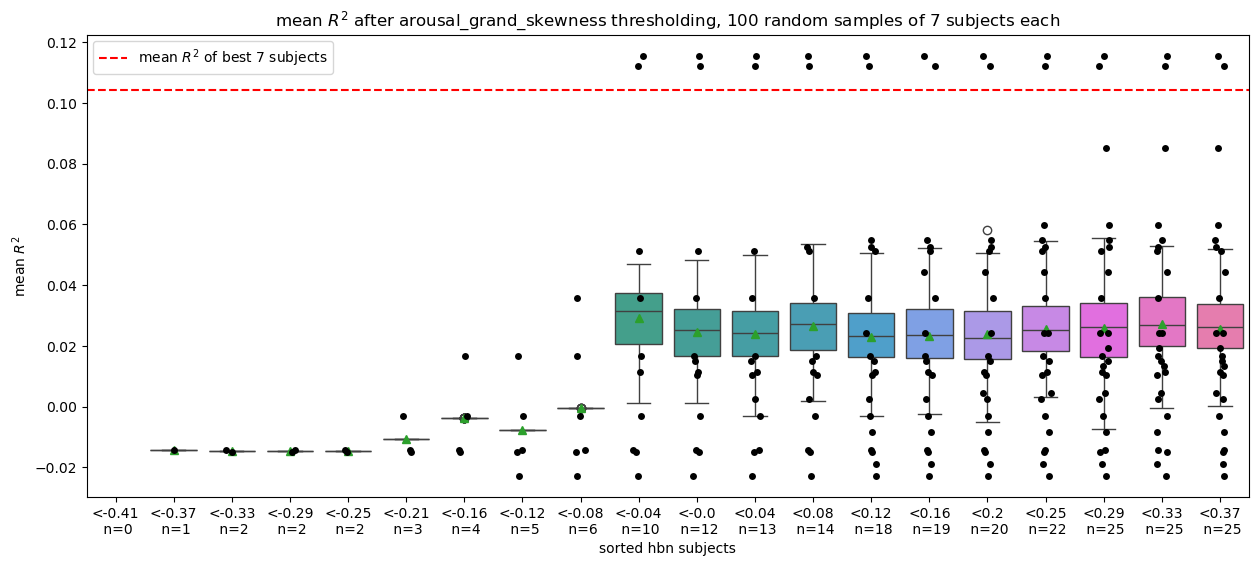

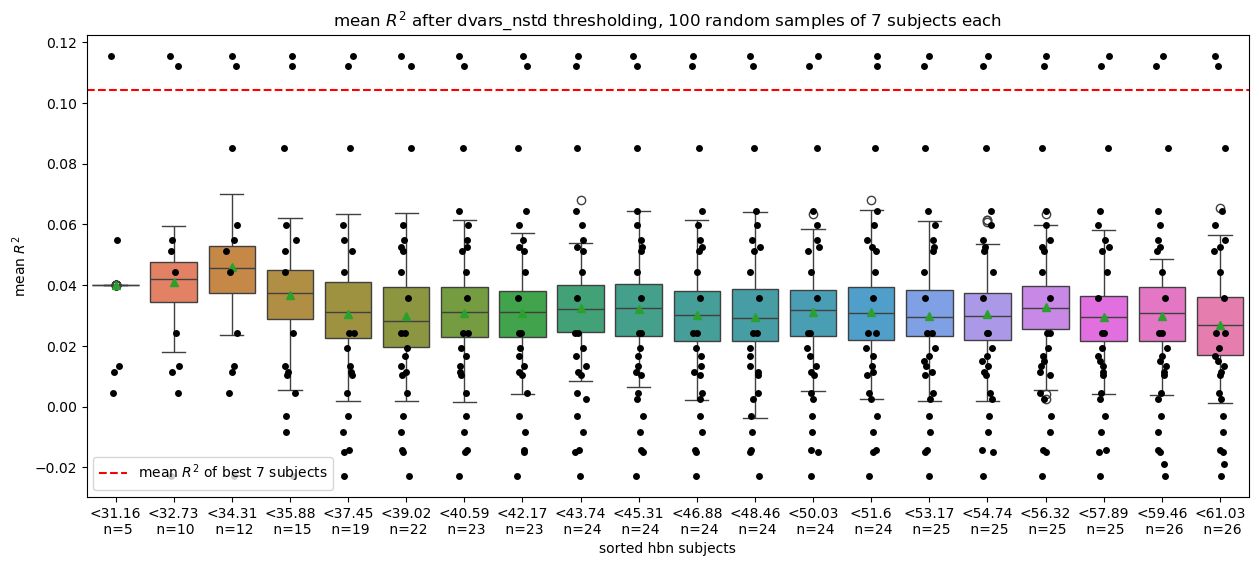

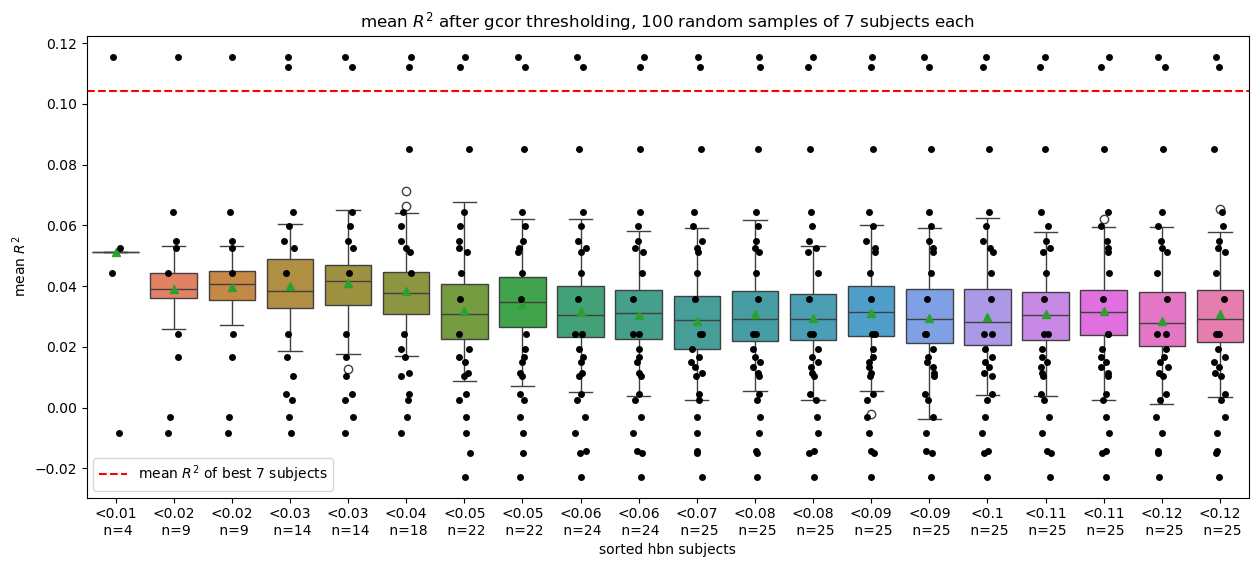

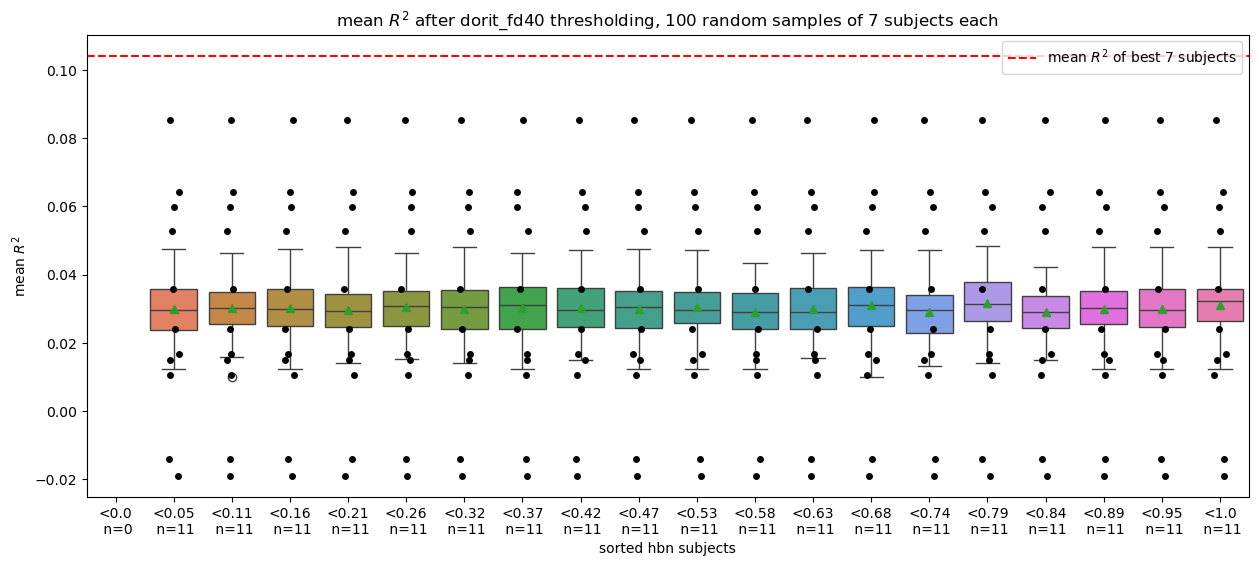

In [80]:
import random
features_list=['Mean_FD', 'Max_FD', 'uncertainty', 'arousal_grand_skewness', 'dvars_nstd','gcor','dorit_fd40']

for feature in features_list: 
    minimum=min(metrics[feature])
    maximum=max(metrics[feature])
    
    thresholds=np.round(  np.linspace(minimum+(minimum*.1),max(metrics[feature])+(minimum*.1),20)  ,2)
    
    
    fd_thresh_list=[]
    fd_thresh_list_all=[]
    count_list=[]
    for fd_thresh in thresholds:#[2.0,1.0,0.5,0.4,0.3,0.25,0.2,0.15]:
        #print(f'thresh: {fd_thresh}')
        count = len([value for value in metrics[feature] if value < fd_thresh])
        count_list.append(count)
        #print(count)
        # Step 1: Identify indices where values in mriqc_fd_mean_list_sorted are less than x
        indices = [i for i, value in enumerate(metrics[feature]) if value < fd_thresh]
        
        # Step 2: Extract corresponding values from r2_list_sorted
        subset_r2 = [metrics['R2'][i] for i in indices]
        
        # Step 3: Randomly select values from this subset
        # Specify the number of random selections you want to make
        perms_list=[]
        for perms in np.arange(100):
            num_selections = 7
            random_selection = random.sample(subset_r2, min(num_selections, len(subset_r2)))
            #print(random_selection)
            # Step 4: Calculate the mean of the randomly selected values
            mean_value = np.mean(random_selection) if random_selection else None
            #print(mean_value)
            perms_list.append(mean_value)
        fd_thresh_list.append(perms_list)
        fd_thresh_list_all.append(subset_r2)
    
    fig, ax = plt.subplots(figsize=(15, 6))
    
    sns.boxplot(fd_thresh_list,showmeans=True)
    sns.stripplot(data=fd_thresh_list_all, color='black', jitter=True, dodge=True)

    ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
    ax.set_xlabel('sorted hbn subjects')
    ax.set_ylabel('mean $R^2$')
    ax.set_title(f'mean $R^2$ after {feature} thresholding, 100 random samples of 7 subjects each')
    #ax.set_xticks(ind + width / num_bars)
    ax.set_xticklabels([f'<{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])
    
    plt.axhline(y=np.mean([value for value in metrics['R2'] if value > 0.081]), color='r', linestyle='--',label='mean $R^2$ of best 7 subjects')
    plt.legend()

/tmp/ipykernel_3719155/2835065645.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
/tmp/ipykernel_3719155/2835065645.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'>{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])
/tmp/ipykernel_3719155/2835065645.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
/tmp/ipykernel_3719155/2835065645.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'>{thresh}\n n={count_list[i]}' for i,thresh in en

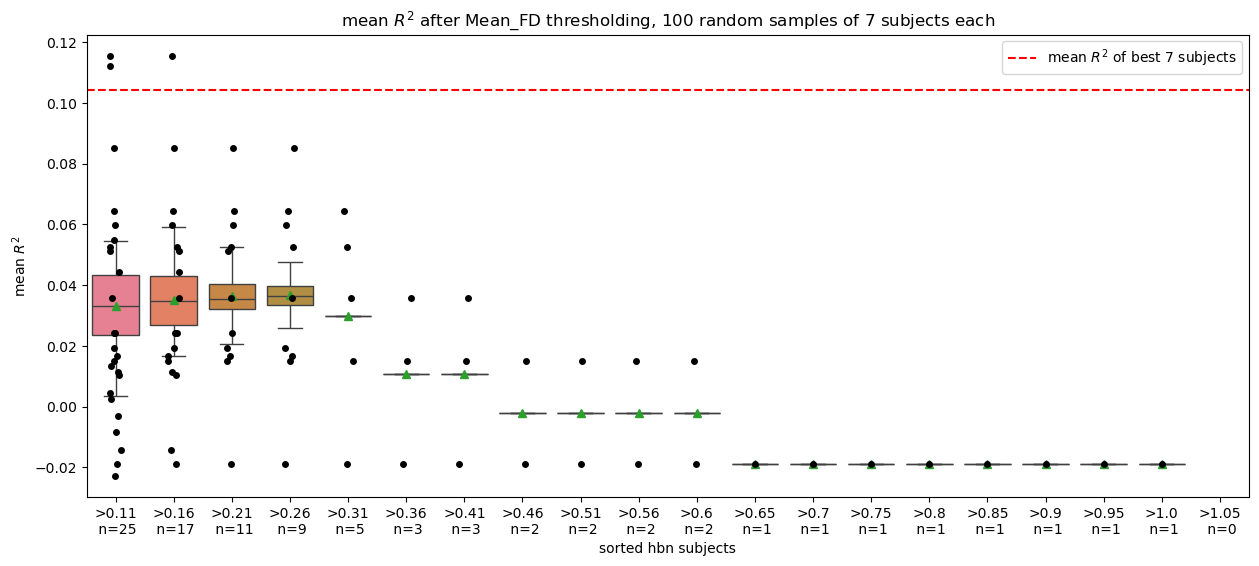

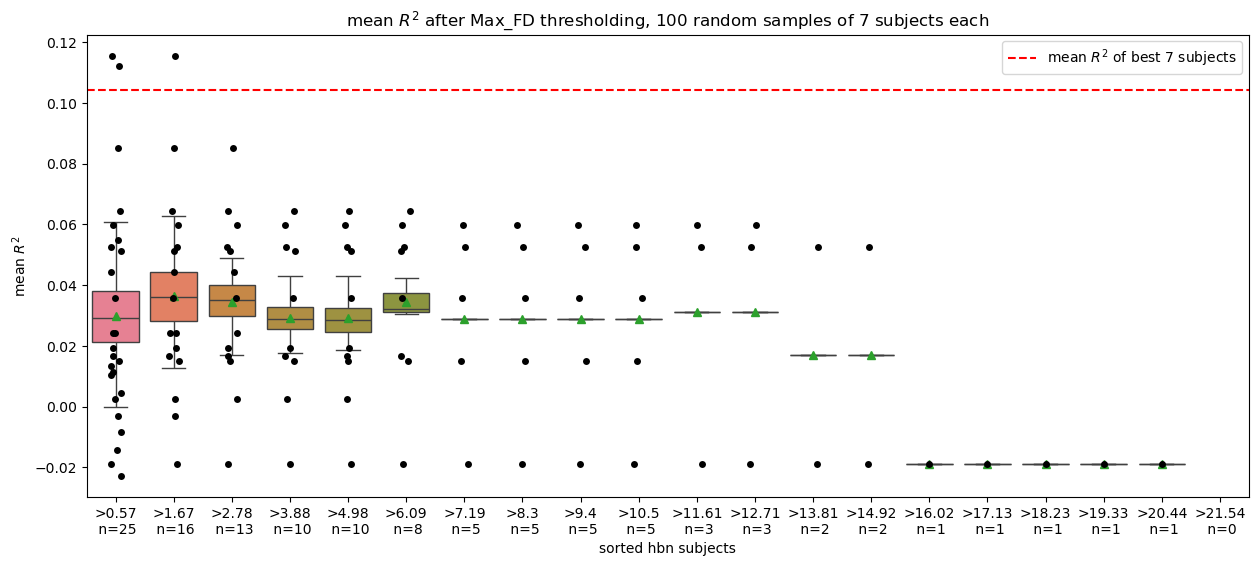

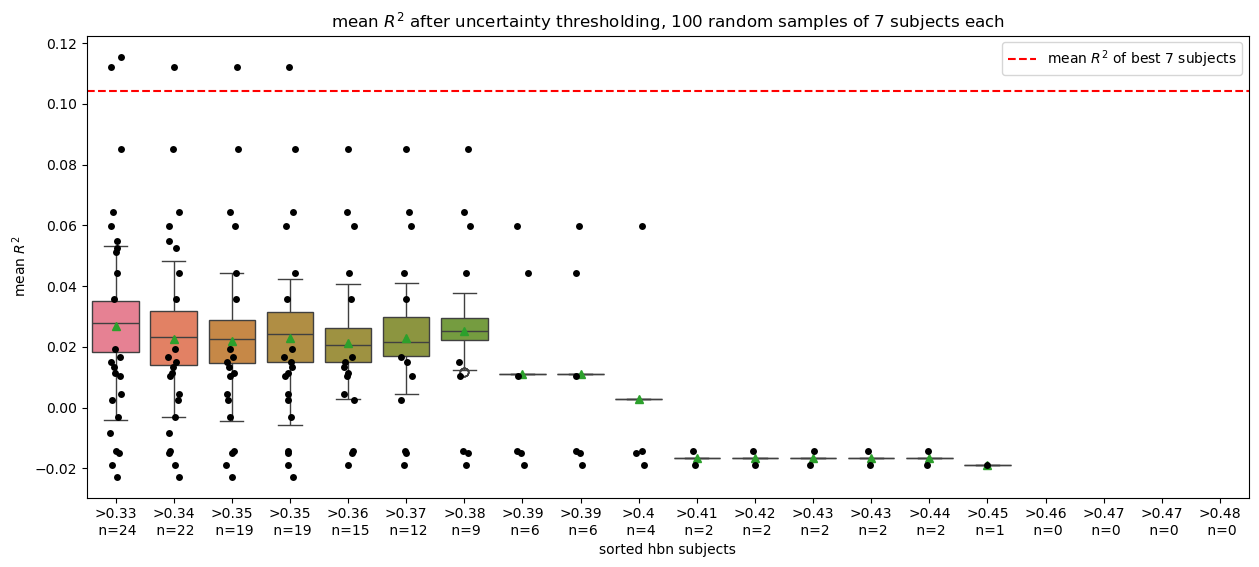

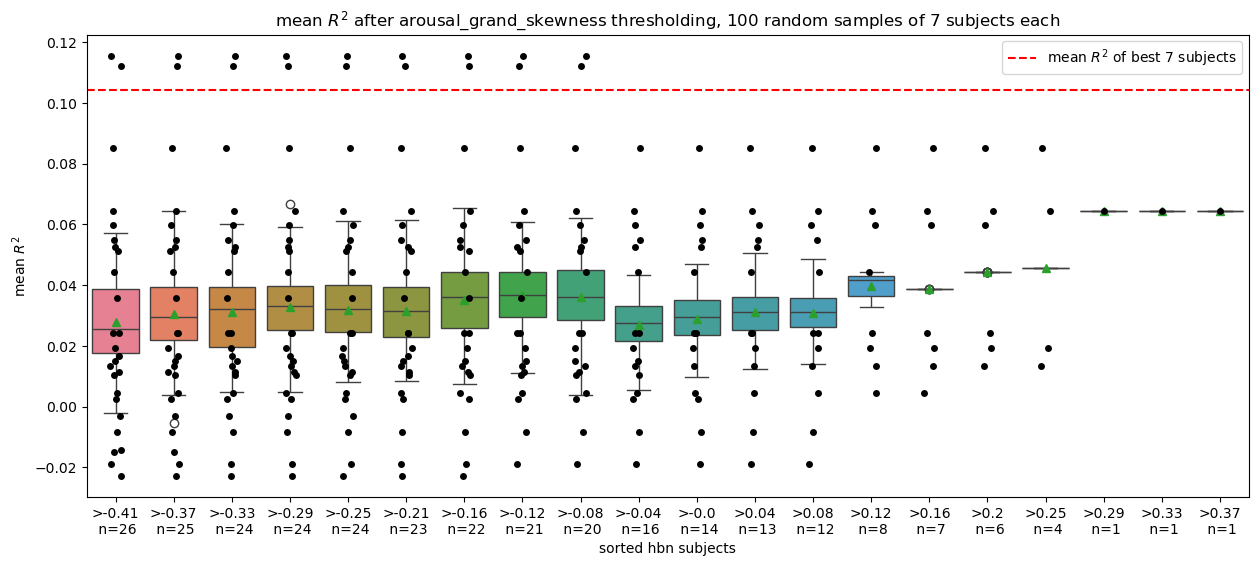

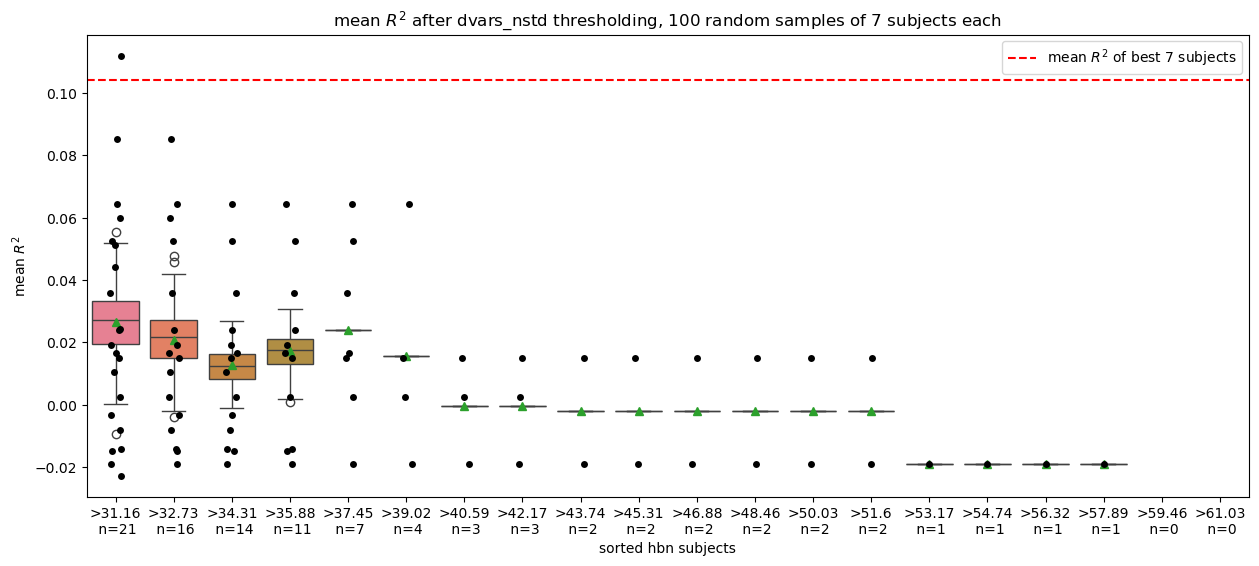

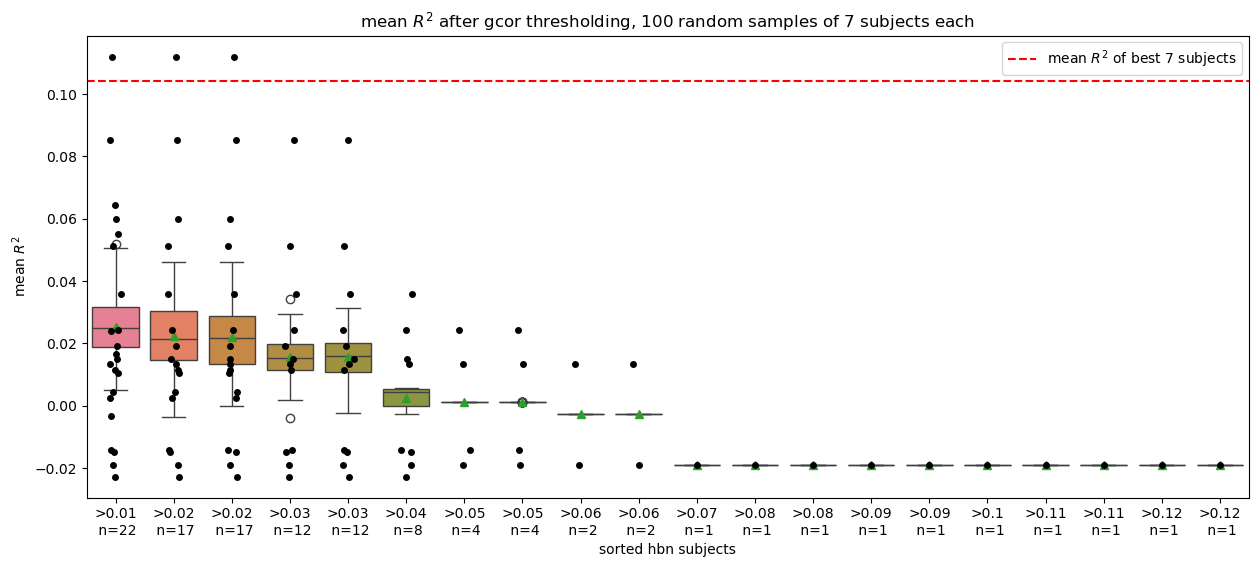

In [81]:
import random
features_list=['Mean_FD', 'Max_FD', 'uncertainty', 'arousal_grand_skewness', 'dvars_nstd','gcor']

for feature in features_list: 
    minimum=min(metrics[feature])
    maximum=max(metrics[feature])
    
    thresholds=np.round(  np.linspace(minimum+(minimum*.1),max(metrics[feature])+(minimum*.1),20)  ,2)
    
    
    fd_thresh_list=[]
    fd_thresh_list_all=[]
    count_list=[]
    for fd_thresh in thresholds:#[2.0,1.0,0.5,0.4,0.3,0.25,0.2,0.15]:
        #print(f'thresh: {fd_thresh}')
        count = len([value for value in metrics[feature] if value > fd_thresh])
        count_list.append(count)
        #print(count)
        # Step 1: Identify indices where values in mriqc_fd_mean_list_sorted are less than x
        indices = [i for i, value in enumerate(metrics[feature]) if value > fd_thresh]
        
        # Step 2: Extract corresponding values from r2_list_sorted
        subset_r2 = [metrics['R2'][i] for i in indices]
        
        # Step 3: Randomly select values from this subset
        # Specify the number of random selections you want to make
        perms_list=[]
        for perms in np.arange(100):
            num_selections = 7
            random_selection = random.sample(subset_r2, min(num_selections, len(subset_r2)))
            #print(random_selection)
            # Step 4: Calculate the mean of the randomly selected values
            mean_value = np.mean(random_selection) if random_selection else None
            #print(mean_value)
            perms_list.append(mean_value)
        fd_thresh_list.append(perms_list)
        fd_thresh_list_all.append(subset_r2)
    
    fig, ax = plt.subplots(figsize=(15, 6))
    
    sns.boxplot(fd_thresh_list,showmeans=True)
    sns.stripplot(data=fd_thresh_list_all, color='black', jitter=True, dodge=True)

    ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
    ax.set_xlabel('sorted hbn subjects')
    ax.set_ylabel('mean $R^2$')
    ax.set_title(f'mean $R^2$ after {feature} thresholding, 100 random samples of 7 subjects each')
    #ax.set_xticks(ind + width / num_bars)
    ax.set_xticklabels([f'>{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])
    
    plt.axhline(y=np.mean([value for value in metrics['R2'] if value > 0.081]), color='r', linestyle='--',label='mean $R^2$ of best 7 subjects')
    plt.legend()

### plot subjects excluded by certain thresholds

/tmp/ipykernel_3719155/2989254965.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(features_names)


Text(0, 0.5, 'mean subject $R^2$')

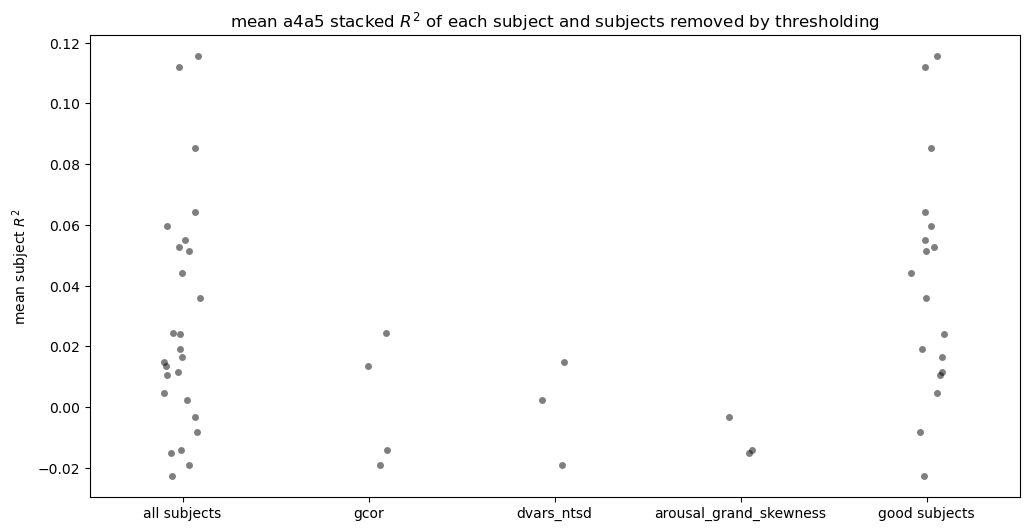

In [82]:
# thresholds:
# gcor<0.05
# dvars_ntsd<39
# arousal_grand_skewness>-0.2
features_names=['all subjects','gcor','dvars_ntsd','arousal_grand_skewness','good subjects']
features_list_lessthan=['gcor','dvars_nstd']
features_list_lessthan_values=[0.05,40]
features_list_greaterthan=['arousal_grand_skewness']
features_list_greaterthan_values=[-0.21]

features_data=[]

features_data.append(metrics['R2'])
remove_indices=[]
for ii,feature in enumerate(features_list_lessthan):
    indices = [i for i, value in enumerate(metrics[feature]) if value > features_list_lessthan_values[ii]]
    subset_r2 = [metrics['R2'][i] for i in indices]
    for r in indices:
        remove_indices.append(r)
    features_data.append(subset_r2)

for ii,feature in enumerate(features_list_greaterthan):
    indices = [i for i, value in enumerate(metrics[feature]) if value < features_list_greaterthan_values[ii]]
    subset_r2 = [metrics['R2'][i] for i in indices]
    features_data.append(subset_r2)
    for r in indices:
        remove_indices.append(r)

list(set(remove_indices))
good_r2 = [item for i, item in enumerate(metrics['R2']) if i not in remove_indices]
features_data.append(good_r2)


fig, ax = plt.subplots(figsize=(12, 6))

sns.stripplot(data=features_data, color='k', jitter=True, dodge=True,alpha=0.5)
ax.set_xticklabels(features_names)
ax.set_title(f'mean a4a5 stacked $R^2$ of each subject and subjects removed by thresholding')
ax.set_ylabel('mean subject $R^2$')






# fig, ax = plt.subplots(figsize=(15, 6))

# sns.boxplot(fd_thresh_list,showmeans=True)
# sns.stripplot(data=fd_thresh_list_all, color='black', jitter=True, dodge=True)

# ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
# ax.set_xlabel('sorted hbn subjects')
# ax.set_ylabel('mean $R^2$')
# ax.set_title(f'mean $R^2$ after {feature} thresholding, 100 random samples of 7 subjects each')
# #ax.set_xticks(ind + width / num_bars)
# ax.set_xticklabels([f'>{thresh}\n n={count_list[i]}' for i,thresh in enumerate(thresholds)])

# plt.axhline(y=np.mean([value for value in metrics['R2'] if value > 0.081]), color='r', linestyle='--',label='mean $R^2$ of best 7 subjects')
# plt.legend()

In [83]:
good_subjects = [item for i, item in enumerate(good_subjects_list) if i not in remove_indices]
good_subjects

['NDARLA226ADX',
 'NDAREM731BYM',
 'NDARHJ830RXD',
 'NDARVB897AH1',
 'NDARLV252DY2',
 'NDARJM828PAL',
 'NDARRB942UWU',
 'NDARFA402LMW',
 'NDARRB359CRR',
 'NDARUX340FYC',
 'NDARPV009TYX',
 'NDARRM073JKA',
 'NDARTG937LDA',
 'NDARUT018UYN',
 'NDARYA379LKT',
 'NDARVD194JX2',
 'NDARVR601FUT',
 'NDARUL694GYN']

In [84]:
with open('thresholded_pilots_ru_dm_list.txt', 'w') as file:
    for item in good_subjects:
        file.write(f"{item}\n")